In [11]:
import joblib

# Define the path to your model file
model_filename = 'churn_model2.pkl'  # <-- CHANGE THIS to your model's file name

try:
    # Load the model from the file
    model = joblib.load(model_filename)
    print(f"✅ Model '{model_filename}' loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: The model file '{model_filename}' was not found. Make sure it's in the same folder.")

✅ Model 'churn_model2.pkl' loaded successfully!


In [12]:
import pandas as pd

# Define the path to your data file
data_filename = 'output1.csv'  # <-- Make sure this is the correct file name

try:
    # Load the data from the CSV file into a DataFrame
    X_test = pd.read_csv(data_filename)
    print(f"✅ Data '{data_filename}' loaded successfully!")
    
    # Display the first few rows to preview the data
    print("Data preview:")
    display(X_test.head())
    
except FileNotFoundError:
    print(f"❌ Error: The data file '{data_filename}' was not found.")
    print("Please make sure the file is in the same folder as your notebook.")

✅ Data 'output1.csv' loaded successfully!
Data preview:


,curr_ann_amt,days_tenure,age_in_years,date_of_birth,latitude,longitude,city,state,county,income,...,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,Demographics_Cluster,Financial_Cluster,Geographic_Cluster,Policy_Behavioral_Cluster
0,818.877997,1454.0,44,832,32.578829,-96.305006,46,0,9,22500.0,...,0,15,1.0,1.0,1.0,0,3,0,1,2
1,974.199182,1795.0,72,494,32.732209,-97.000893,36,0,2,27500.0,...,1,15,1.0,0.0,0.0,0,5,2,1,4
2,967.375112,4818.0,55,700,32.819777,-96.846938,21,0,2,42500.0,...,0,17,1.0,0.0,0.0,0,5,2,1,0
3,992.409561,130.0,53,723,32.684065,-97.162180,5,0,13,125000.0,...,0,5,1.0,0.0,1.0,1,1,4,2,3
4,784.633494,5896.0,50,763,32.751398,-97.376745,33,0,13,87500.0,...,0,7,1.0,1.0,1.0,0,3,1,2,0


In [13]:
# Define the columns that are identifiers, not features for the model
identifier_cols = ['individual_id']

# Create a new DataFrame for the model that *excludes* the identifier columns
X_features = X_test.drop(columns=identifier_cols, errors='ignore')  

print("✅ Created a new DataFrame for the model with the following features:")
print(X_features.columns.tolist())

print("\nOriginal X_test shape:", X_test.shape)
print("Features-only X_features shape:", X_features.shape)

✅ Created a new DataFrame for the model with the following features:
['curr_ann_amt', 'days_tenure', 'age_in_years', 'date_of_birth', 'latitude', 'longitude', 'city', 'state', 'county', 'income', 'has_children', 'marital_status', 'home_market_value', 'home_owner', 'college_degree', 'good_credit', 'Churn', 'Demographics_Cluster', 'Financial_Cluster', 'Geographic_Cluster', 'Policy_Behavioral_Cluster']

Original X_test shape: (37500, 21)
Features-only X_features shape: (37500, 21)


In [14]:
# --- 1. Identify Your Columns ---

# TODO: IMPORTANT! List the names of all columns that contain text here.
# Also include any numeric columns that should be treated as categories (like postal codes).
categorical_cols = [
    'date_of_birth',          # Example column, replace with your actual ones
    'city',  # Example column
    'marital_status',        # Example column
    'acct_suspd_date',
    'cust_orig_date',
    'state',
    'county', 
    'home_market_value'

]

# List the columns that are just identifiers and should NOT be used for modeling.
identifier_cols = ['individual_id', 'address_id']


# --- 2. Create the Features DataFrame (if not already done) ---
# This DataFrame should exclude the identifier columns.
X_features = X_test.drop(columns=identifier_cols, errors='ignore')



# --- 3. Apply One-Hot Encoding ---
# This automatically converts all your listed categorical columns into numeric ones.
print("Original shape of features data:", X_features.shape)
print("Original data types:\n", X_features.dtypes)

#X_features_encoded = pd.get_dummies(X_features, columns=categorical_cols, drop_first=True)

print("\n" + "="*50 + "\n")
print("Shape of features data after encoding:", X_features.shape)
print("Data types after encoding:\n", X_features.dtypes)
print("\n✅ Preprocessing complete! Your data is now all numeric.")
print("Preview of the new, encoded data:")
display(X_features.head())

# --- 4. Final Check for Non-Numeric Data ---
# This will alert you if any non-numeric columns are left.
remaining_objects = X_features.select_dtypes(include=['object', 'category']).columns.tolist()
if not remaining_objects:
    print("\nSuccess! All columns are now numeric.")
else:
    print(f"\n⚠️ Warning: The following columns are still not numeric: {remaining_objects}")

Original shape of features data: (37500, 21)
Original data types:
 curr_ann_amt                 float64
days_tenure                  float64
age_in_years                   int64
date_of_birth                  int64
latitude                     float64
longitude                    float64
city                           int64
state                          int64
county                         int64
income                       float64
has_children                 float64
marital_status                 int64
home_market_value              int64
home_owner                   float64
college_degree               float64
good_credit                  float64
Churn                          int64
Demographics_Cluster           int64
Financial_Cluster              int64
Geographic_Cluster             int64
Policy_Behavioral_Cluster      int64
dtype: object


Shape of features data after encoding: (37500, 21)
Data types after encoding:
 curr_ann_amt                 float64
days_tenure             

,curr_ann_amt,days_tenure,age_in_years,date_of_birth,latitude,longitude,city,state,county,income,...,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,Demographics_Cluster,Financial_Cluster,Geographic_Cluster,Policy_Behavioral_Cluster
0,818.877997,1454.0,44,832,32.578829,-96.305006,46,0,9,22500.0,...,0,15,1.0,1.0,1.0,0,3,0,1,2
1,974.199182,1795.0,72,494,32.732209,-97.000893,36,0,2,27500.0,...,1,15,1.0,0.0,0.0,0,5,2,1,4
2,967.375112,4818.0,55,700,32.819777,-96.846938,21,0,2,42500.0,...,0,17,1.0,0.0,0.0,0,5,2,1,0
3,992.409561,130.0,53,723,32.684065,-97.162180,5,0,13,125000.0,...,0,5,1.0,0.0,1.0,1,1,4,2,3
4,784.633494,5896.0,50,763,32.751398,-97.376745,33,0,13,87500.0,...,0,7,1.0,1.0,1.0,0,3,1,2,0



Success! All columns are now numeric.


In [15]:
# --- 1. Get the feature names that the model was originally trained on ---
# The trained XGBoost model stores the exact list of feature names it expects.
model_feature_names = model.get_booster().feature_names
print(f"The model was trained on {len(model_feature_names)} features.")


# --- 2. Reindex your new data to match the model's columns perfectly ---
# This is the key step. .reindex() will:
#  - ADD any columns that are in the model but missing from your new data (and fill them with 0).
#  - DROP any columns that are in your new data but not in the model.
#  - REORDER all columns to match the model's expected order.

print(f"Your preprocessed data has {len(X_features.columns)} features before alignment.")

X_features_aligned = X_features.reindex(columns=model_feature_names, fill_value=0)

print(f"Your preprocessed data now has {len(X_features_aligned.columns)} features after alignment.")
print("\n✅ Data alignment complete! Your data now perfectly matches the model's structure.")
print("Preview of the final, aligned data:")
display(X_features_aligned.head())

The model was trained on 20 features.
Your preprocessed data has 21 features before alignment.
Your preprocessed data now has 20 features after alignment.

✅ Data alignment complete! Your data now perfectly matches the model's structure.
Preview of the final, aligned data:


,curr_ann_amt,days_tenure,age_in_years,date_of_birth,latitude,longitude,city,state,county,income,has_children,marital_status,home_market_value,home_owner,college_degree,good_credit,Demographics_Cluster,Financial_Cluster,Geographic_Cluster,Policy_Behavioral_Cluster
0,818.877997,1454.0,44,832,32.578829,-96.305006,46,0,9,22500.0,1.0,0,15,1.0,1.0,1.0,3,0,1,2
1,974.199182,1795.0,72,494,32.732209,-97.000893,36,0,2,27500.0,0.0,1,15,1.0,0.0,0.0,5,2,1,4
2,967.375112,4818.0,55,700,32.819777,-96.846938,21,0,2,42500.0,0.0,0,17,1.0,0.0,0.0,5,2,1,0
3,992.409561,130.0,53,723,32.684065,-97.162180,5,0,13,125000.0,1.0,0,5,1.0,0.0,1.0,1,4,2,3
4,784.633494,5896.0,50,763,32.751398,-97.376745,33,0,13,87500.0,1.0,0,7,1.0,1.0,1.0,3,1,2,0


In [16]:
import shap

print("Running SHAP analysis on the ALIGNED features...")

# Use the X_features_aligned DataFrame
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_features_aligned) # <--- USE THE ALIGNED DATA

print("✅ SHAP analysis complete!")

Running SHAP analysis on the ALIGNED features...
✅ SHAP analysis complete!


Plot will be saved as: output1_aggregated_importance.png
--- Aggregated Feature Importance ---
original_feature
Policy_Behavioral_Cluster    7.607358
days_tenure                  0.450707
curr_ann_amt                 0.268921
date_of_birth                0.226915
income                       0.219788
age_in_years                 0.183481
latitude                     0.172224
Demographics_Cluster         0.153784
longitude                    0.149328
city                         0.106877
home_market_value            0.091148
home_owner                   0.049070
good_credit                  0.038533
Financial_Cluster            0.036954
marital_status               0.035968
college_degree               0.034351
county                       0.032281
has_children                 0.028548
Geographic_Cluster           0.021471
state                        0.000000
Name: shap_importance, dtype: float32


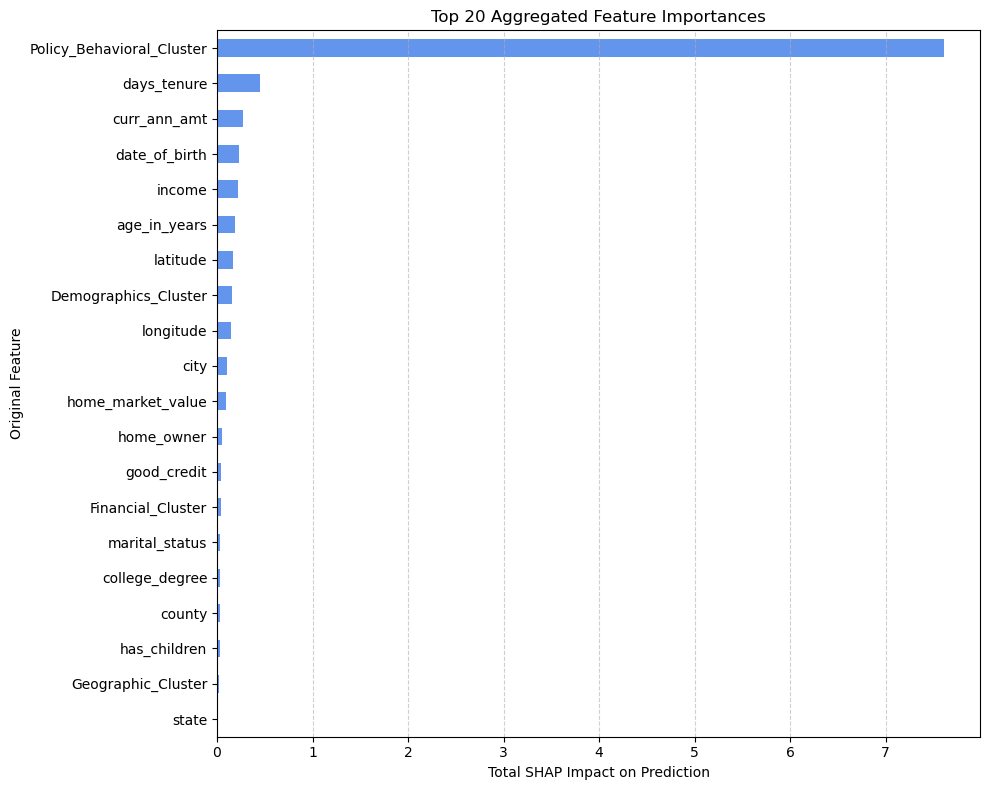

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

data_filename = 'output1.csv' # Make sure this matches the file you loaded

# --- 2. Create the output plot filename dynamically ---
# Get the base name of the file (e.g., 'X_test') by splitting off the extension
base_name = os.path.splitext(data_filename)[0]
output_filename = f'{base_name}_aggregated_importance.png'
print(f"Plot will be saved as: {output_filename}")

# --- 1. Calculate the mean absolute SHAP value for each feature ---
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame(
    list(zip(X_features_aligned.columns, mean_abs_shap)),
    columns=['feature_name', 'shap_importance']
)

# --- 2. Intelligently find and group by the original feature names ---
# Make sure this list is correct and matches what you used for one-hot encoding!
categorical_cols = [
    'city',
    'marital_status',
    'acct_suspd_date',
    'cust_orig_date',
    'state',
    'county',
    'home_market_value',
    'date_of_birth'
]

# Create a mapping from the encoded column name back to its original root
feature_map = {}
for col in feature_importance['feature_name']:
    found = False
    for cat_col in categorical_cols:
        if col.startswith(cat_col + '_'):
            feature_map[col] = cat_col
            found = True
            break
    if not found:
        feature_map[col] = col # If it's not a one-hot encoded column, its name is itself

feature_importance['original_feature'] = feature_importance['feature_name'].map(feature_map)

# --- 3. Sum the importances for each original feature ---
aggregated_importance = feature_importance.groupby('original_feature')['shap_importance'].sum()

# --- 4. Sort and plot the final, clean bar chart ---
aggregated_importance_sorted = aggregated_importance.sort_values(ascending=False)

print("--- Aggregated Feature Importance ---")
print(aggregated_importance_sorted.head(20))

# Create the plot
plt.figure(figsize=(10, 8))
aggregated_importance_sorted.head(20).plot(kind='barh', color='cornflowerblue') # Plot top 20
plt.gca().invert_yaxis() # Display the most important feature at the top
plt.title('Top 20 Aggregated Feature Importances')
plt.xlabel('Total SHAP Impact on Prediction')
plt.ylabel('Original Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot to a file
plt.savefig(output_filename)
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
import os  # For handling file paths
import re  # For regular expressions to clean the filename

# --- 1. Define your input CSV filename ---
# This variable should already exist from your data loading cell
data_filename = 'output1.csv'  # Using your example

# --- 2. Create the output plot filename with your custom rule ---
# Get the base name and extension
base_name_full, extension = os.path.splitext(data_filename) # -> ('output2', '.csv')

# Use a regular expression to remove any numbers at the end of the base name

# Create the final base name you want to use
final_base_name = base_name + extension # -> 'output.csv'

# Now, create the plot filename for the summary plot
output_filename = f'{os.path.splitext(final_base_name)[0]}_summary_plot_top30.png' # -> 'output_summary_plot_top30.png'
print(f"Original filename: {data_filename}")
print(f"Plot will be saved as: {output_filename}")


# --- 3. Generate the SHAP Summary Plot (Beeswarm) ---
# This plot uses the original, non-aggregated shap_values and the aligned features.
print("\nGenerating the detailed SHAP Summary Plot (Top 30)...")

shap.summary_plot(
    shap_values,
    X_features_aligned,
    max_display=30,  # <-- Displaying the top 30 features
    show=False       # We set show to False to save it manually
)

# --- 4. Save the plot using the new dynamic filename ---
# Use bbox_inches='tight' to ensure all labels are included in the saved image
plt.savefig(output_filename, bbox_inches='tight')
plt.close() # Close the plot to free up memory

print(f"\n✅ Detailed summary plot with 30 features has been saved as '{output_filename}'.")

Original filename: output1.csv
Plot will be saved as: output_summary_plot_top30.png

Generating the detailed SHAP Summary Plot (Top 30)...

✅ Detailed summary plot with 30 features has been saved as 'output_summary_plot_top30.png'.


In [10]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Get the customer ID from the user ---
try:
    # Ask the user to enter an ID
    id_input = input("Enter the individual_id of the customer you want to analyze: ")
    target_individual_id = int(id_input) # Convert the input to an integer

    # --- 2. Find the row index for this individual ---
    # Search the original X_test DataFrame (which has the IDs) to find the row number
    individual_index = X_test[X_test['individual_id'] == target_individual_id].index[0]
    
    print(f"\nFound individual_id '{target_individual_id}' at row index: {individual_index}.")
    print("Generating their SHAP force plot...")

    # --- 3. Generate the Force Plot for that specific person ---
    # We use the found index to get their specific SHAP values and feature values
    shap.force_plot(
        explainer.expected_value,
        shap_values[individual_index],
        X_features_aligned.iloc[individual_index],
        matplotlib=True, # Use matplotlib=True to create a static, saveable plot
        show=False       # We set show=False to save it manually
    )
    
    # --- 4. Save the plot to a unique file ---
    output_filename = f'force_plot_individual_{target_individual_id}.png'
    plt.savefig(output_filename, bbox_inches='tight')
    plt.close() # Close the plot to free up memory

    print(f"✅ Force plot has been saved as '{output_filename}'")

except ValueError:
    print("❌ Error: Invalid input. Please enter a valid number for the ID.")
except IndexError:
    print(f"❌ Error: Could not find an individual with the ID '{target_individual_id}' in the dataset.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

An unexpected error occurred: 'individual_id'
